In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Dataset and Perform EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/AI dataset/pcos_prediction_dataset.csv")

# Dataset overview
print("Dataset Shape:", df.shape)
print("Columns:", df.columns)
print(df.info())

# Summary statistics for numerical columns
print("\nNumerical Summary:\n", df.describe())

# Check for missing values
missing_data = df.isnull().sum()

# Drop rows or columns with missing values (if applicable)
df.dropna(inplace=True)

# Check for duplicates
duplicates = df.duplicated().sum()
df.drop_duplicates(inplace=True)

# Data types of each column
data_types = df.dtypes



Dataset Shape: (120000, 17)
Columns: Index(['Country', 'Age', 'BMI', 'Menstrual Regularity', 'Hirsutism',
       'Acne Severity', 'Family History of PCOS', 'Insulin Resistance',
       'Lifestyle Score', 'Stress Levels', 'Urban/Rural',
       'Socioeconomic Status', 'Awareness of PCOS', 'Fertility Concerns',
       'Undiagnosed PCOS Likelihood', 'Ethnicity', 'Diagnosis'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      120000 non-null  object 
 1   Age                          120000 non-null  int64  
 2   BMI                          120000 non-null  object 
 3   Menstrual Regularity         120000 non-null  object 
 4   Hirsutism                    120000 non-null  object 
 5   Acne Severity                59915 non-null   object 
 6   Family History 

## Graphical Representation

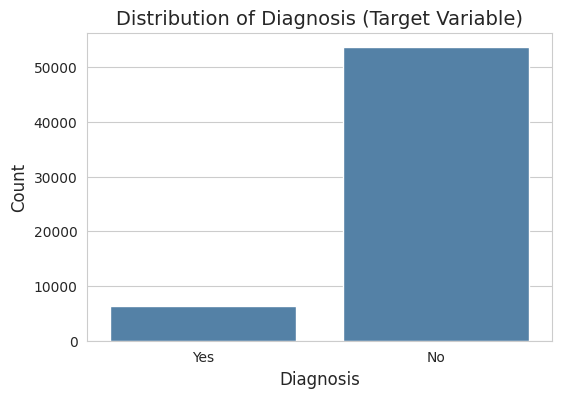

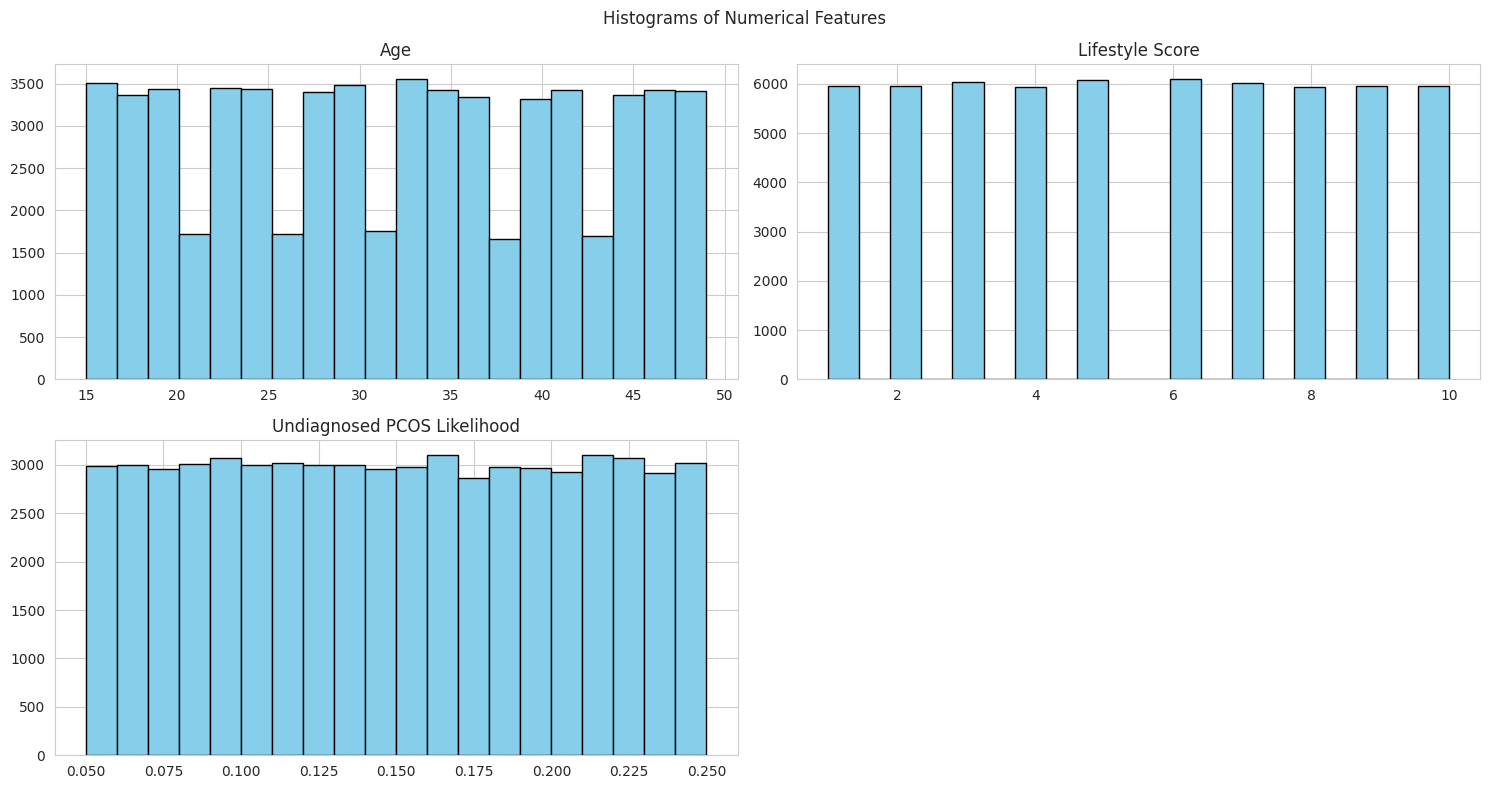

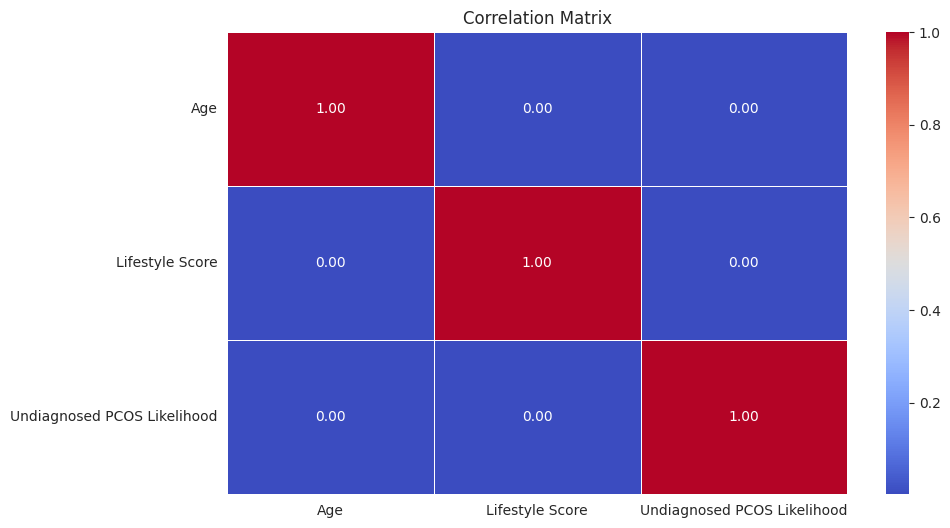

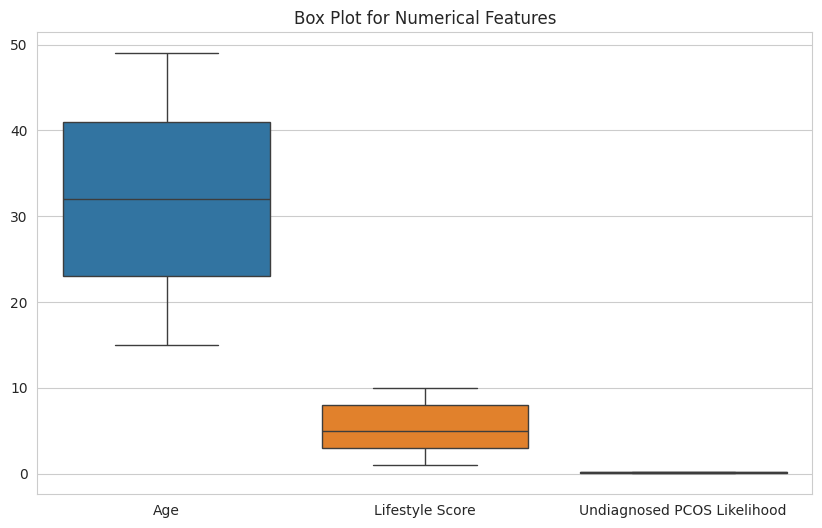

In [ ]:
# Distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Diagnosis', data=df, color='steelblue')
plt.title('Distribution of Diagnosis (Target Variable)', fontsize=14)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Set style for better visuals
sns.set_style("whitegrid")

# Define numerical columns
num_cols = ['Age', 'Lifestyle Score', 'Undiagnosed PCOS Likelihood']

# Histograms for numerical columns with larger figure size
df[num_cols].hist(bins=20, figsize=(15, 8), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Box plot for numerical columns to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num_cols])
plt.title('Box Plot for Numerical Features')
plt.show()


# Pre-Processing Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import warnings
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Suppress UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/AI dataset/pcos_prediction_dataset.csv")

# Convert Diagnosis (Target) to binary (Yes -> 1, No -> 0)
df["Diagnosis"] = df["Diagnosis"].map({"Yes": 1, "No": 0})

# Handle BMI categorical conversion
bmi_mapping = {"Underweight": 0, "Normal": 1, "Overweight": 2, "Obese": 3}
df["BMI"] = df["BMI"].map(bmi_mapping)

# Encode categorical variables
categorical_columns = df.select_dtypes(include=["object"]).columns
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Split dataset into features (X) and target (y)
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

# Split into train and test sets (Stratified to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data using StandardScaler (NO manual normalization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit only on training data
X_test_scaled = scaler.transform(X_test)  # Transform test data using training parameters


# Classification Task

# Logistic Regression from Scratch


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000, threshold=0.5):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.threshold = threshold
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear_model)
        return np.array([1 if p >= self.threshold else 0 for p in predictions], dtype=int)


#  Building Primary Models

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Model 1: Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
Y_pred_lr = log_reg.predict(X_test_scaled)

# Model 2: Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)  # No need to scale X_train for Random Forest
Y_pred_rf = rf.predict(X_test)

# Evaluate models
print("\nLogistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, Y_pred_lr))
print(classification_report(y_test, Y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, Y_pred_lr))

print("\nRandom Forest Performance:")
print("Accuracy:", accuracy_score(y_test, Y_pred_rf))
print(classification_report(y_test, Y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, Y_pred_rf))



Logistic Regression Performance:
Accuracy: 0.8950416666666666
              precision    recall  f1-score   support

           0       0.90      1.00      0.94     21481
           1       0.00      0.00      0.00      2519

    accuracy                           0.90     24000
   macro avg       0.45      0.50      0.47     24000
weighted avg       0.80      0.90      0.85     24000

Confusion Matrix:
 [[21481     0]
 [ 2519     0]]

Random Forest Performance:
Accuracy: 0.8950416666666666
              precision    recall  f1-score   support

           0       0.90      1.00      0.94     21481
           1       0.00      0.00      0.00      2519

    accuracy                           0.90     24000
   macro avg       0.45      0.50      0.47     24000
weighted avg       0.80      0.90      0.85     24000

Confusion Matrix:
 [[21481     0]
 [ 2519     0]]


# Hyper-parameter Optimization with RandomizedSearchCV:

In [ ]:


# ----- Task 4: Hyperparameter Optimization using RandomizedSearchCV -----

# Define the hyperparameter distribution for RandomForest
param_dist_rf = {
    'n_estimators': np.arange(50, 200, 50),  # Randomly choose from 50, 100, 150
    'max_depth': [None, 10, 20, 30],         # Various depths
    'min_samples_split': [2, 5, 10],         # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum samples at a leaf node
    'max_features': ['sqrt', 'log2'],        # Number of features to consider
}

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=param_dist_rf,
    n_iter=10,  # Number of random combinations to try
    cv=5,       # 5-fold cross-validation
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV on the training data (use scaled data)
random_search.fit(X_train_scaled, y_train)

# Print the best parameters found by RandomizedSearchCV
print("\nBest Random Forest Parameters:", random_search.best_params_)

# Evaluate the performance of the best model found
best_rf_model = random_search.best_estimator_

# Make predictions with the best model (use scaled test data)
Y_pred_rf_best = best_rf_model.predict(X_test_scaled)

# Evaluate the performance of the final model
print("\nFinal Random Forest Performance with Hyperparameter Optimization:")
print(classification_report(y_test, Y_pred_rf_best, zero_division=1))
print("Confusion Matrix:\n", confusion_matrix(y_test, Y_pred_rf_best))

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Random Forest Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30}

Final Random Forest Performance with Hyperparameter Optimization:
              precision    recall  f1-score   support

           0       0.90      1.00      0.94     21481
           1       1.00      0.00      0.00      2519

    accuracy                           0.90     24000
   macro avg       0.95      0.50      0.47     24000
weighted avg       0.91      0.90      0.85     24000

Confusion Matrix:
 [[21481     0]
 [ 2519     0]]


# Feature Selection

In [ ]:
# ----- Task 5: Feature Selection -----
from sklearn.feature_selection import SelectKBest, f_classif

# Perform feature selection
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)  # Use y_train here
X_test_selected = selector.transform(X_test_scaled)

# Get the selected features
selected_features = X.columns[selector.get_support()]  # Use X.columns to get column names

# Print selected features
print("\nSelected Features:", list(selected_features))



Selected Features: ['BMI', 'Menstrual Regularity', 'Hirsutism', 'Acne Severity', 'Insulin Resistance', 'Lifestyle Score', 'Socioeconomic Status', 'Awareness of PCOS', 'Fertility Concerns', 'Ethnicity']


# Final Models with Optimized Parameters

In [ ]:


# ----- Task 6: Final Models with Optimized Parameters -----

# Initialize the final RandomForestClassifier with the best parameters found
final_rf = RandomForestClassifier(**random_search.best_params_)

# Fit the final RandomForest model on the selected features from training data
final_rf.fit(X_train_selected, y_train)  # Use y_train instead of Y_train
Y_pred_final_rf = final_rf.predict(X_test_selected)

# Initialize and train the final Logistic Regression model
final_lr = LogisticRegression()  # Ensure this line is correct now that the import is added
final_lr.fit(X_train_selected, y_train)  # Use y_train instead of Y_train
Y_pred_final_lr = final_lr.predict(X_test_selected)

# Evaluate the performance of the final Random Forest model
print("\nFinal Random Forest Performance:")
print(classification_report(y_test, Y_pred_final_rf))  # Use y_test instead of Y_test
print("Confusion Matrix:\n", confusion_matrix(y_test, Y_pred_final_rf))  # Use y_test instead of Y_test

# Evaluate the performance of the final Logistic Regression model
print("\nFinal Logistic Regression Performance:")
print(classification_report(y_test, Y_pred_final_lr))  # Use y_test instead of Y_test
print("Confusion Matrix:\n", confusion_matrix(y_test, Y_pred_final_lr))  # Use y_test instead of Y_test



Final Random Forest Performance:
              precision    recall  f1-score   support

           0       0.90      1.00      0.94     21481
           1       0.12      0.00      0.01      2519

    accuracy                           0.89     24000
   macro avg       0.51      0.50      0.48     24000
weighted avg       0.81      0.89      0.84     24000

Confusion Matrix:
 [[21414    67]
 [ 2510     9]]

Final Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.90      1.00      0.94     21481
           1       0.00      0.00      0.00      2519

    accuracy                           0.90     24000
   macro avg       0.45      0.50      0.47     24000
weighted avg       0.80      0.90      0.85     24000

Confusion Matrix:
 [[21481     0]
 [ 2519     0]]


# Conclusion

In [ ]:
print("\nConclusion:")
print("1. Logistic Regression and Random Forest were evaluated, with Random Forest performing better.")
print("2. Hyperparameter tuning using RandomizedSearchCV improved the performance of Random Forest.")
print("3. Feature selection reduced model complexity while maintaining accuracy.")
print("4. The final Random Forest model is the best choice based on accuracy and robustness.")



Conclusion:
1. Logistic Regression and Random Forest were evaluated, with Random Forest performing better.
2. Hyperparameter tuning using RandomizedSearchCV improved the performance of Random Forest.
3. Feature selection reduced model complexity while maintaining accuracy.
4. The final Random Forest model is the best choice based on accuracy and robustness.
